# Aulia Rahim Nugrahani
https://www.linkedin.com/in/auliarnugrahani/


##Introduction
This is data from an online retail company, with customers who have spread from various countries. The company has sales data that contains all transactions that occurred in 2009-2011.

##Business Question  
The main question that the company wants is, 
"How the sales performance in the last 3 years?" 

I'll break down the questions to answer the main question, as follows:
1. Average revenue per year,
2. Total completed and canceled transactions, and 
3. Cancellation rate per year.

# Import Library

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/DS/homework/Salinan online_retail_II.csv')

In [37]:
df.sample(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
885558,568211,21811,HANGING HEART WITH BELL,48,2011-09-25 15:59:00,0.39,13429.0,United Kingdom
178966,506347,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-04-29 11:56:00,2.55,14512.0,United Kingdom
527672,536569,22571,ROCKING HORSE RED CHRISTMAS,4,2010-12-01 15:35:00,0.85,16274.0,United Kingdom
891413,568716,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,2,2011-09-28 16:13:00,3.29,NaN,United Kingdom
280619,516730,20718,RED SPOTTY SHOPPER BAG,2,2010-07-22 13:39:00,1.25,17068.0,United Kingdom
...,...,...,...,...,...,...,...,...
375434,525701,22491,PACK OF 12 COLOURED PENCILS,12,2010-10-06 12:49:00,0.85,16384.0,United Kingdom
95904,498436,22433,WATERING CAN GREEN DINOSAUR,1,2010-02-18 18:33:00,1.95,14686.0,United Kingdom
468711,533558,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,24,2010-11-18 09:22:00,0.85,17732.0,United Kingdom
875703,567621,23329,DECORATIVE WICKER HEART LARGE,2,2011-09-21 12:46:00,1.65,16016.0,United Kingdom


##Exploratory Data Analysis

In [7]:
# Data Checking (General Information form Dataframe)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [8]:
# check duplicate rows
duplicate = df[df.duplicated()]
duplicate

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [9]:
# Drop the duplicate rows
df1 = df.drop_duplicates()
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
# Check duplicate rows
df1[df1.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [11]:
# Check missing value
df1.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

There are 4275 and 235151 records with NaN values on Description and Customer ID. The NaN value will not affect our sales performance analysis. So we will just ignore from the dataset.

In [14]:
# Convert columns InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%Y/%m/%d %H:%M:%S')

In [15]:
# Create new column for Year and Month
df1['Year'] = pd.DatetimeIndex(df1['InvoiceDate']).year
df1['Month'] = pd.DatetimeIndex(df1['InvoiceDate']).month

In [42]:
# Filter custumer who finished their purchase
df2 = df1[(df1['Quantity'] >= 1) & (df1['Invoice'].str.contains("C") == False)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010539 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1010539 non-null  object 
 1   StockCode    1010539 non-null  object 
 2   Description  1008897 non-null  object 
 3   Quantity     1010539 non-null  int64  
 4   InvoiceDate  1010539 non-null  object 
 5   Price        1010539 non-null  float64
 6   Customer ID  779495 non-null   float64
 7   Country      1010539 non-null  object 
 8   Year         1010539 non-null  int64  
 9   Month        1010539 non-null  int64  
 10  Revenue      1010539 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 92.5+ MB


In [45]:
# Create new column for Revenue
df2['Revenue'] = df2['Quantity'] * df2['Price']

## Data Visualization

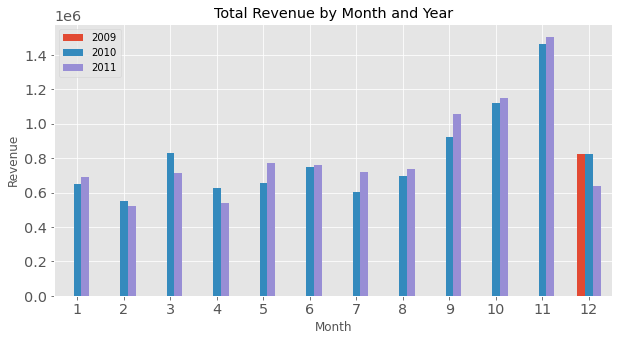

In [49]:
# visualize total revenue by month and year
revenue_by_month_year = df2.groupby(['Month', 'Year'], as_index = False).sum()
revenue_by_month_year = revenue_by_month_year.pivot(index = 'Month', columns = 'Year', values = 'Revenue')

revenue_by_month_year.plot(kind = 'bar')
plt.title('Total Revenue by Month and Year')
plt.xlabel('Month')
plt.xticks(rotation = 360)
plt.ylabel('Revenue')
plt.legend(loc = 'upper left')
plt.show()

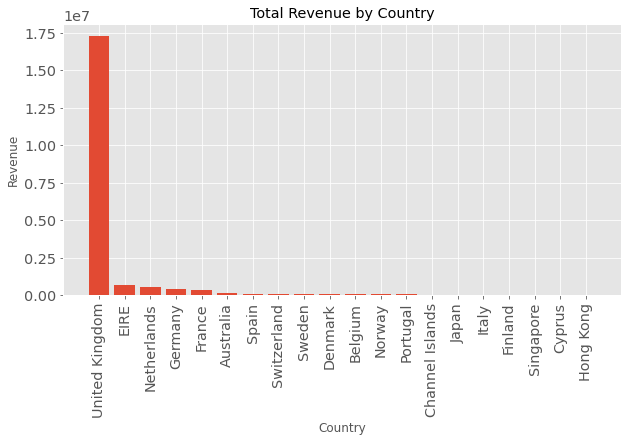

In [56]:
# visualize total revenue by country
revenue_by_country = df2.groupby(['Country'], as_index = False).sum()
revenue_by_country = revenue_by_country.sort_values(['Revenue'], ascending=False)
revenue_by_country = revenue_by_country.head(20)

x = revenue_by_country['Country']
y = revenue_by_country['Revenue']

plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Revenue')

plt.bar(x, y)
plt.show()

In [46]:
# Average of revenue per year
Avg_Revenue = df2.groupby(['Year'])['Revenue'].mean()
Avg_Revenue

Year
2009    18.856094
2010    20.114942
2011    20.208908
Name: Revenue, dtype: float64

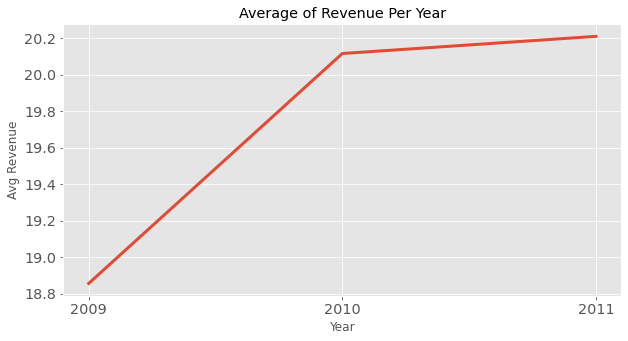

In [52]:
# Visualize average of revenue per year
x = df2['Year'].unique() 
fig, ax=plt.subplots()
x = ['2009','2010', '2011']
plt.title('Average of Revenue Per Year')
plt.xlabel('Year')
plt.ylabel('Avg Revenue')
ax.plot(x,Avg_Revenue)
plt.show()

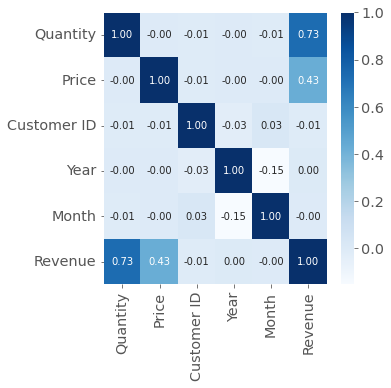

In [61]:
# Heatmap 
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(),cmap='Blues',annot=True, fmt='.2f')

# Interpretation

* Revenue for the last three years shows an increasing trend. The 2009 
had the lowest revenue, this is because in 2019 sales only occurred in December. November in both 2010 and 2011 was the month with the highest revenue
* The highest revenue occurs in the United States.
* Revenue with quantity has a strong correlation and other correlates with price.

## Section 2

### Filtering Data 

In [77]:
# Customers who finished their purchases
finished = df2.dropna(axis=0, subset=['Customer ID'])
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,30.00
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,12,14.85


In [63]:
# Check missing value
finished['Customer ID'].isnull().sum()

0

In [66]:
# Customers who canceled their purchases
canceled = df1[df1['Invoice'].str.contains("C") == True]
canceled

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,12,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,12,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,12,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,12,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,12,-35.40
...,...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,-224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,-54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,-1.25


### Number of Finished and Canceled Transactions Each Year

In [78]:
# Convert columns InvoiceDate to datetime format
finished['Year'] = pd.DatetimeIndex(finished['InvoiceDate']).year

In [79]:
# Number of finished transaction each year
f = finished.groupby(['Year'])['Invoice'].count()
f

Year
2009     30279
2010    382156
2011    367060
Name: Invoice, dtype: int64

In [126]:
# Convert columns InvoiceDate to datetime format
canceled['Year'] = pd.DatetimeIndex(canceled['InvoiceDate']).year

In [125]:
# Number of finished transaction each year
c = canceled.groupby(['Year'])['Invoice'].count()
c

Year
2009    1013
2010    9559
2011    8532
Name: Invoice, dtype: int64

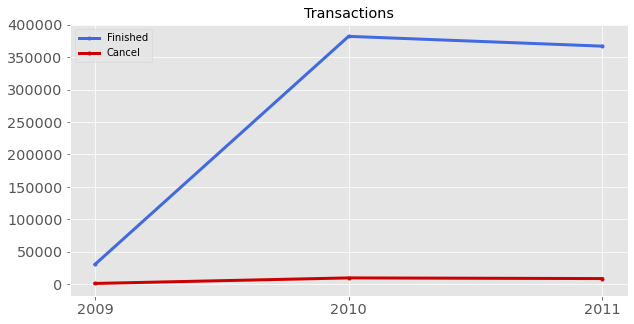

In [130]:
# Visualize finished and canceled transactions by Year
fig, ax=plt.subplots()
x = ['2009','2010', '2011']
y = f.unique()
z = c.unique()
ax.set_title("Transactions")
ax.plot(x, y, marker='.', color='royalblue', label='Finished')
ax.plot(x, z, marker='.', color='#cc0000', label='Cancel')
ax.legend(loc= "upper left")
plt.show()

### Cancellation Rate

In [89]:
# Calculate cancellation rate each year
cancellation_rate = canceled.groupby(['Year'])['Invoice'].count()/df1.groupby(['Year'])['Invoice'].count()*100
cancellation_rate

Year
2009    2.265104
2010    1.936380
2011    1.724818
Name: Invoice, dtype: float64

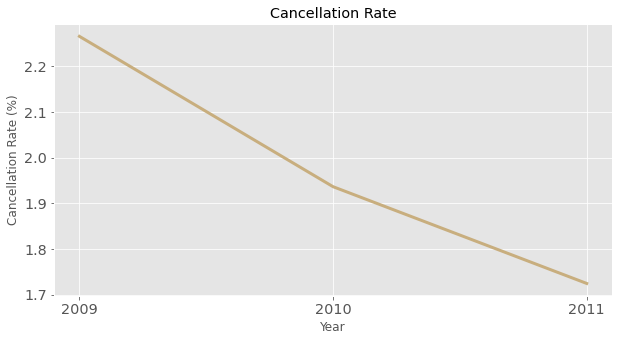

In [90]:
# Visualize cancellation rate by year
y = cancellation_rate.unique()
fig, ax=plt.subplots()
x = ['2009','2010','2011']
plt.title('Cancellation Rate')
plt.xlabel('Year')
plt.ylabel('Cancellation Rate (%)')
ax.plot(x,y, color = '#C8AE7E')
plt.show()

### Interpretation

In the last three years, from 2009 to 2011 the number of transactions increased, followed by a steadily decreasing cancellation rate. This shows that sales performance continues to improve.